## Análise de Crédito

Esse notebook tem como objetivo realizar utilizar análise descritiva e técnicas de Machine Learning em dados de concessão de crédito, buscando encontrar padrões e determinar se um cliente e um bom ou um mau pagador.

### 1. Importando as bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


### 2. Importando o arquivo csv

In [2]:
credito_df = pd.read_csv('Python_M10_support material.csv')

### 3. Explorando os Dados

In [3]:
credito_df.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

In [4]:
credito_df.head() #verificando os dados

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [5]:
credito_df.info() #observando informações mais detalhadas como tipo dos dados e existência de nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [6]:
credito_df.describe()

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [7]:
credito_df.tail() #verificando os dados

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


In [8]:
credito_df.shape #verificando o shape do dataset

(10127, 16)

In [9]:
credito_df.duplicated().sum() #não existem valores duplicados no dataset

0

### 4. Limpando e Tranformando os dados

In [10]:
credito_df['idade'] = credito_df['idade'].abs()

In [11]:
credito_df['default'] = LabelEncoder().fit_transform(credito_df['default'])

In [12]:
credito_df['sexo'] = LabelEncoder().fit_transform(credito_df['sexo'])

In [13]:
credito_df['escolaridade'] = LabelEncoder().fit_transform(credito_df['escolaridade'])

In [14]:
credito_df['estado_civil'] = LabelEncoder().fit_transform(credito_df['estado_civil'])

In [15]:
credito_df['tipo_cartao'] = LabelEncoder().fit_transform(credito_df['tipo_cartao'])

In [16]:
scaler = StandardScaler()

In [17]:
credito_df['salario_anual'].unique()

array(['$60K - $80K', 'menos que $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'na'], dtype=object)

In [18]:
credito_df['salario_anual'] = credito_df['salario_anual'].replace({'$60K - $80K':80,'menos que $40K':40,'$40K - $60K':60,'$80K - $120K':120,'$120K +':120,'na':0})

In [19]:
credito_df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,1,3,1,0,80,0,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,0,5,3,3,40,0,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,1,3,3,0,120,0,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,0,4,1,2,40,0,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,1,3,5,0,80,0,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,3,60,0,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,1,2,4,1,60,0,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,0,1,1,0,40,0,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,1,2,3,2,60,0,36,4,3,3,"5.281,84","8.395,62",62


In [20]:
credito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  int32 
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  int32 
 6   estado_civil             10127 non-null  int32 
 7   salario_anual            10127 non-null  int64 
 8   tipo_cartao              10127 non-null  int32 
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [21]:
credito_df['limite_credito'] = credito_df['limite_credito'].str.replace('.', '')

<ipython-input-21-ba4384ab4d7b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  credito_df['limite_credito'] = credito_df['limite_credito'].str.replace('.', '')


In [22]:
credito_df['valor_transacoes_12m'] = credito_df['limite_credito'].replace('.', '')

In [23]:
credito_df['limite_credito'] = pd.to_numeric(credito_df['limite_credito'].str.replace(',', '.'))


In [24]:
credito_df['valor_transacoes_12m'] = pd.to_numeric(credito_df['limite_credito'].replace(',', '.'))

In [25]:
credito_df[['idade', 'salario_anual','meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m', 'qtd_transacoes_12m']] = scaler.fit_transform(credito_df[['idade','salario_anual', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m', 'qtd_transacoes_12m']])

## 5. Análise Descritiva

In [27]:
def generate_plots(df, columns):
    for col in columns:
        sns.countplot(x=col, data=df)
        plt.show()

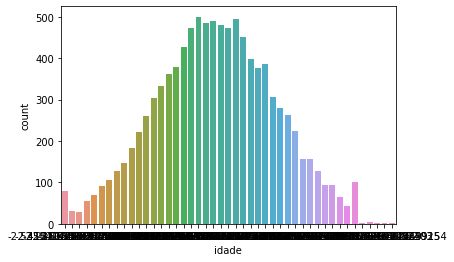

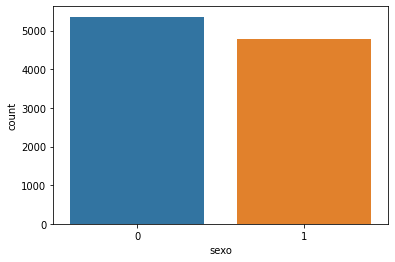

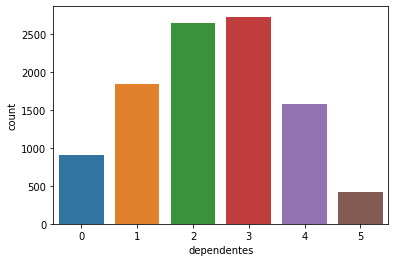

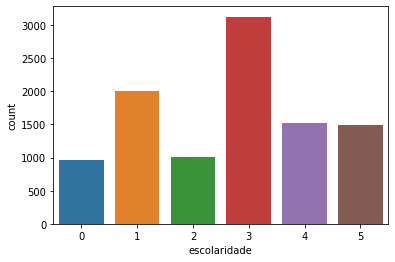

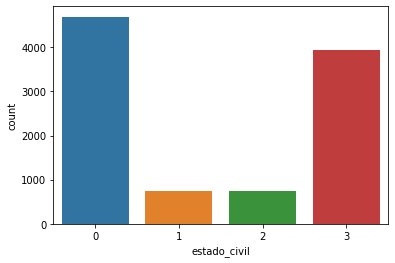

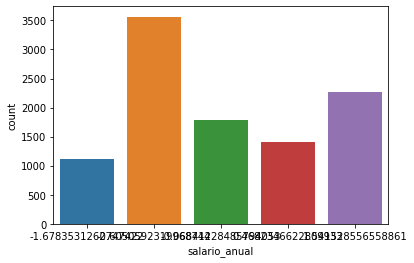

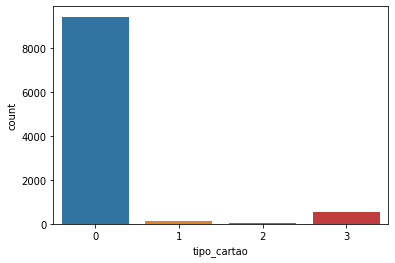

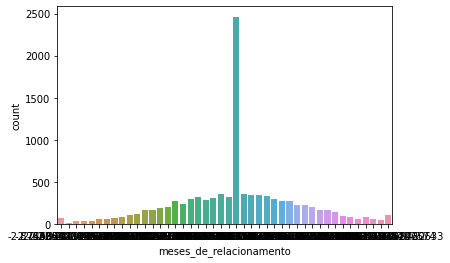

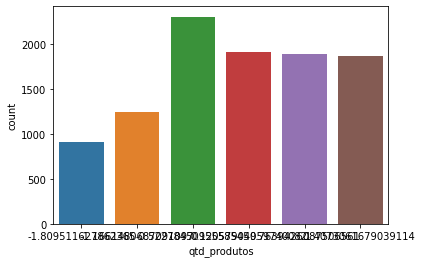

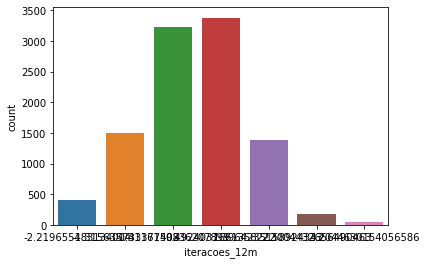

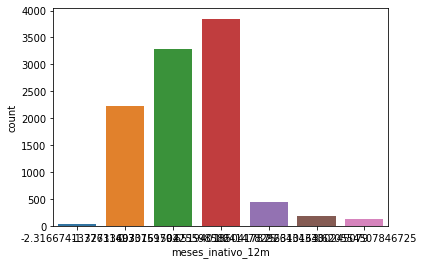

In [ ]:
generate_plots(credito_df, ['idade', 'sexo', 'dependentes', 'escolaridade','estado_civil', 'salario_anual', 'tipo_cartao','meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m','qtd_transacoes_12m'])


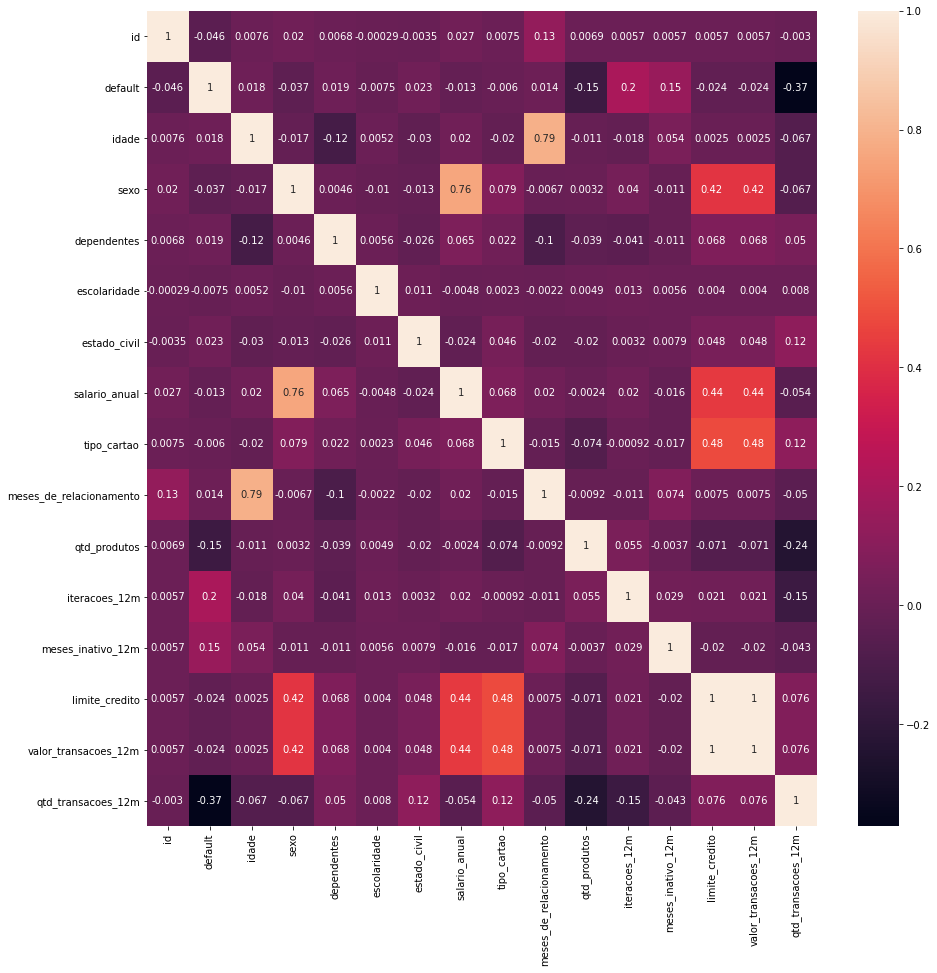

In [32]:
plt.figure(figsize=(15, 15))
corr = credito_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [33]:
X = credito_df.drop(['default'], axis=1)
y = credito_df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_pred))
print('Matriz de confusão:', confusion_matrix(y_test, y_pred))

Acurácia: 0.8558736426456071
Matriz de confusão: [[1548  151]
 [ 141  186]]
